## Preprocess data

First read data from directory. After reading data, convert the categorical column into numerical values that can be put into neural network.

Using 'glob' package we can read data files containing specific characters. 

In [2]:
import pandas as pd

In [3]:
path = "D:/rfiles/feature_matrix/feature_matrix_energy8_1024_inner.csv"
df = pd.read_csv(path)
df.head()

,E1,E2,E3,E4,E5,E6,E7,E8,fault_type
0,1.8697,3.6478,0.33794,0.035385,0.007739,0.008556,0.004237,0.000475,Normal
1,1.8725,2.8091,0.32781,0.041769,0.009650,0.010740,0.005232,0.001947,Normal
2,2.0595,3.8041,0.36825,0.036564,0.006459,0.008987,0.005481,0.000967,Normal
3,2.5273,3.5595,0.35947,0.038535,0.006255,0.008491,0.002687,0.000332,Normal
4,1.8534,3.6642,0.35441,0.038339,0.006703,0.008614,0.004021,0.001111,Normal


Now we will read the first files and use it in further analysis. 

In [4]:
df["fault_type"].value_counts()

Normal        1657
0.007 inch     476
0.021 inch     474
0.014 inch     472
0.028 inch     471
Name: fault_type, dtype: int64

Now we will split the total data into training and test set. The dataset is unbalanced (it has more normal data as compared to other faulty data types). So first we create a balanced dataset and then form a training and test set.

In [5]:
import numpy as np
from numpy.random import choice 
np.random.seed(1)
index = np.array([choice(np.arange(0,1657),450,replace = False),
                choice(np.arange(1657,2133),450,replace = False),
                choice(np.arange(2133,2605),450,replace = False),
                choice(np.arange(2605,3079),450,replace = False),
                choice(np.arange(3079,3550),450,replace = False)])
index = index.ravel()
data = df.iloc[index,]
data = data.reset_index(drop = True)
test_index = np.array([choice(np.arange(0,450),150, replace = False),
                     choice(np.arange(450,2*450),150, replace = False),
                     choice(np.arange(2*450,3*450),150, replace = False),
                     choice(np.arange(3*450,4*450),150, replace = False),
                     choice(np.arange(4*450,5*450),150, replace = False)])
test_index = test_index.ravel()
test_data = data.iloc[test_index,]
train_data = data.drop(data.index[test_index])

# Shuffle data
train_data = train_data.sample(frac = 1, random_state = 2)
test_data = test_data.sample(frac = 1, random_state = 3)

# Convert categorical lables to numberic entries

category_labels = ['Normal', '0.007 inch', '0.014 inch','0.021 inch', '0.028 inch']
# test_labels = test_data['fault_type']
test_labels = pd.Categorical(test_data['fault_type'],categories= category_labels).codes # Produces ndarrays
# train_labels = train_data['fault_type']
train_labels = pd.Categorical(train_data['fault_type'], categories = category_labels).codes

In [6]:
print(data.shape,test_data.shape,train_data.shape,test_labels.shape,train_labels.shape)

(2250, 9) (750, 9) (1500, 9) (750,) (1500,)


In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import sklearn
from sklearn import preprocessing

In [8]:
# Convert labels to categorical data
train_data = train_data.iloc[:,0:8]
test_data = test_data.iloc[:,0:8]
# Scale the data
train_data = preprocessing.scale(train_data)
test_data = preprocessing.scale(test_data)
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [9]:
print(train_data.shape, test_data.shape, train_labels.shape, test_labels.shape)

(1500, 8) (750, 8) (1500, 5) (750, 5)


In [10]:
model = Sequential([
    layers.Dense(5,activation = 'relu', input_dim = 8),
    layers.Dense(5,activation = 'softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 45        
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 30        
Total params: 75
Trainable params: 75
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [12]:
history = model.fit(train_data,train_labels,epochs = 50, validation_split = 0.2, verbose = 2)

Train on 1200 samples, validate on 300 samples
Epoch 1/50
1200/1200 - 0s - loss: 1.7468 - accuracy: 0.3150 - val_loss: 1.6217 - val_accuracy: 0.3500
Epoch 2/50
1200/1200 - 0s - loss: 1.5856 - accuracy: 0.3292 - val_loss: 1.4900 - val_accuracy: 0.3533
Epoch 3/50
1200/1200 - 0s - loss: 1.4608 - accuracy: 0.3475 - val_loss: 1.3864 - val_accuracy: 0.3733
Epoch 4/50
1200/1200 - 0s - loss: 1.3566 - accuracy: 0.3950 - val_loss: 1.2985 - val_accuracy: 0.4800
Epoch 5/50
1200/1200 - 0s - loss: 1.2640 - accuracy: 0.5708 - val_loss: 1.2166 - val_accuracy: 0.5933
Epoch 6/50
1200/1200 - 0s - loss: 1.1771 - accuracy: 0.6400 - val_loss: 1.1366 - val_accuracy: 0.6533
Epoch 7/50
1200/1200 - 0s - loss: 1.0911 - accuracy: 0.7217 - val_loss: 1.0525 - val_accuracy: 0.7500
Epoch 8/50
1200/1200 - 0s - loss: 0.9996 - accuracy: 0.7558 - val_loss: 0.9632 - val_accuracy: 0.7633
Epoch 9/50
1200/1200 - 0s - loss: 0.9044 - accuracy: 0.8733 - val_loss: 0.8707 - val_accuracy: 0.9567
Epoch 10/50
1200/1200 - 0s - loss: 

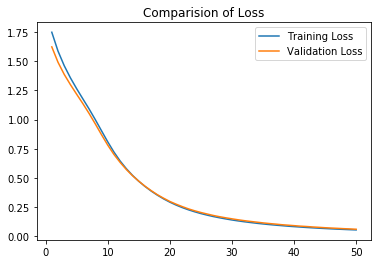

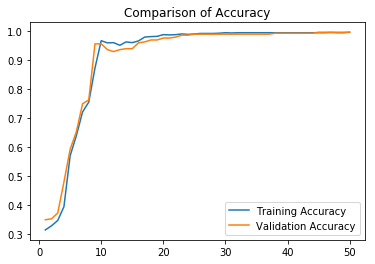

In [14]:
import matplotlib.pyplot as plt
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = np.arange(1,len(train_loss)+1)
plt.figure()
plt.plot(epochs, train_loss, label = "Training Loss")
plt.plot(epochs, val_loss, label = "Validation Loss")
plt.legend()
plt.title("Comparision of Loss")
plt.show()
plt.figure()
plt.plot(epochs, train_acc, label = "Training Accuracy")
plt.plot(epochs, val_acc, label = "Validation Accuracy")
plt.title("Comparison of Accuracy")
plt.legend()
plt.show()

In [15]:
test_loss,test_acc = model.evaluate(test_data, test_labels)

750/750 [==============================] - 0s 36us/sample - loss: 0.0575 - accuracy: 0.9973


In [16]:
print(test_acc)

0.99733335


In [17]:
prediction = model.predict(test_data)
prediction_labels = list([])
for each_prediction in prediction:
    prediction_labels.append(list(each_prediction).index(max(each_prediction)))
    

In [18]:
from sklearn.metrics import confusion_matrix
true_labels = np.argmax(test_labels, axis = 1)
matrix = confusion_matrix(true_labels, prediction_labels)

(array([0.5, 1.5, 2.5, 3.5, 4.5]), <a list of 5 Text xticklabel objects>)

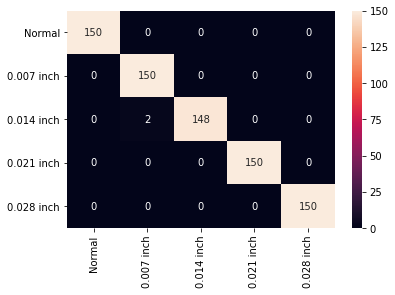

In [31]:
import seaborn as sns
matrix = pd.DataFrame(matrix)
sns.heatmap(matrix, annot= True, fmt = "d",
           xticklabels = category_labels,
           yticklabels = category_labels)
plt.xticks(rotation = 90)